In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [94]:
codecademy = pd.read_csv(r"C:\Users\Carlos\Documents\Python Projects\Linear Regression at Codecademy\codecademy.csv")

In [95]:
codecademy.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items

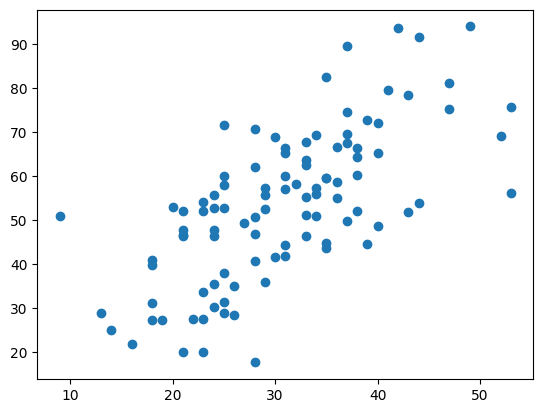

In [96]:
plt.scatter(x = 'completed', y = 'score', data=codecademy)
plt.show()
plt.close()

Create and fit a linear regression model that predicts score using completed as the predictor

In [97]:
model = sm.OLS.from_formula('score ~ completed', data = codecademy)

In [98]:
results = model.fit()

In [99]:
results.params

Intercept    13.214113
completed     1.306826
dtype: float64

Plot the same scatter plot that we made earlier (with score on the y-axis and completed on the x-axis), but this time add the regression line on top of the plot

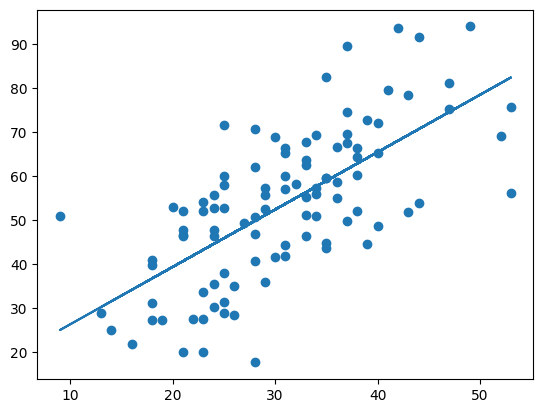

In [100]:
plt.scatter(x='completed', y='score', data = codecademy)
plt.plot(codecademy.completed, results.predict(codecademy))
plt.show()
plt.close()

Use this model to calculate the predicted quiz score for a learner who has previously completed 20 other content items

In [101]:
predict_20 = results.params[0] + results.params[1] * 20

In [102]:
newdata = {'completed':[20]}

In [103]:
predict_20 = results.predict(newdata)

In [104]:
predict_20

0    39.350625
dtype: float64

Calculate the fitted values for your model and save them as fitted_values

In [105]:
fitted_values = results.predict(codecademy)

In [106]:
fitted_values

0     58.953009
1     53.725706
2     56.339358
3     45.884753
4     36.736974
        ...    
95    53.725706
96    82.475869
97    43.271102
98    40.657450
99    51.112055
Length: 100, dtype: float64

Calculate the residuals for the model and save the result as residuals

In [107]:
residuals = codecademy.score - fitted_values

In [108]:
residuals

0     23.746991
1     11.474294
2     -1.039358
3    -17.084753
4     -5.536974
        ...    
95     6.274294
96    -6.675869
97   -15.871102
98     5.942550
99     6.187945
Length: 100, dtype: float64

Check the normality assumption for linear regression by plotting a histogram of the residuals

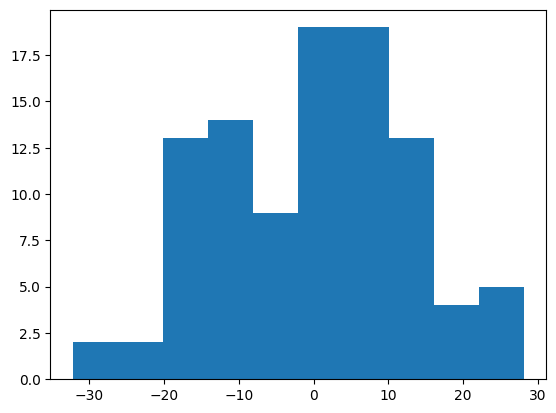

In [109]:
plt.hist(residuals)
plt.show()
plt.close()

Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis)

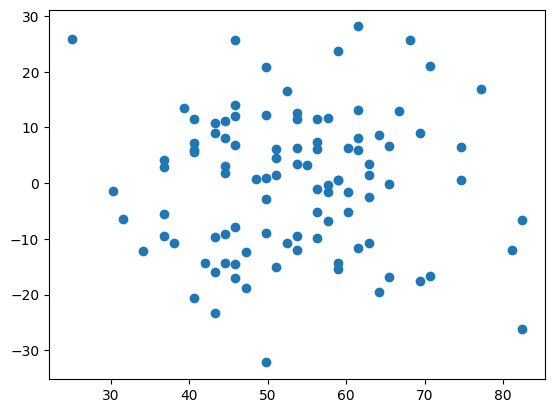

In [110]:
plt.scatter(fitted_values, residuals)
plt.show()
plt.close()

In [111]:
codecademy

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B
...,...,...,...
95,60.0,31.0,Lesson B
96,75.8,53.0,Lesson B
97,27.4,23.0,Lesson B
98,46.6,21.0,Lesson A


Use sns.boxplot to create a boxplot of score (y-variable) for each lesson (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz

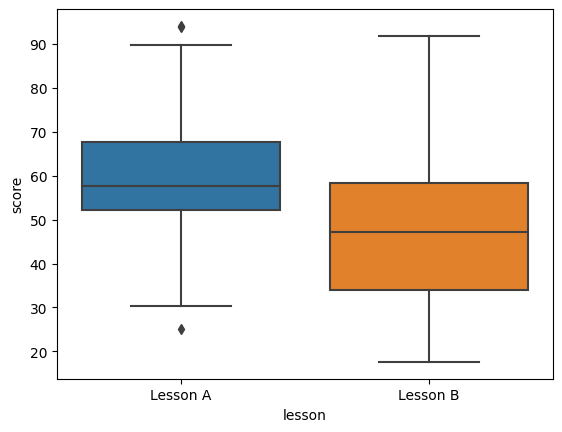

In [112]:
sns.boxplot(x = 'lesson', y= 'score', data = codecademy)
plt.show()
plt.close()

Create and fit a linear regression model that predicts score using lesson as the predictor

In [113]:
model = sm.OLS.from_formula('score ~ lesson', data = codecademy)

In [114]:
results = model.fit()

In [115]:
results.params

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64

Calculate and print out the mean quiz scores for learners who took lesson A and lesson B

Calculate and print out the mean difference

In [116]:
codecademy

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B
...,...,...,...
95,60.0,31.0,Lesson B
96,75.8,53.0,Lesson B
97,27.4,23.0,Lesson B
98,46.6,21.0,Lesson A


In [117]:
mean_score_lesson_a = np.mean(codecademy[codecademy.lesson == 'Lesson A'])

C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [118]:
mean_score_lesson_a

score        59.22
completed    30.18
dtype: float64

In [119]:
mean_score_lesson_b = np.mean(codecademy[codecademy.lesson == 'Lesson B'])

In [120]:
mean_score_lesson_b

score        47.578
completed    31.320
dtype: float64

In [121]:
mean_differnce = mean_score_lesson_a - mean_score_lesson_b

In [122]:
mean_differnce

score        11.642
completed    -1.140
dtype: float64

The next step in linear regression is to model quiz scores as a function of multiple other variables at once

To get a preview of what this might look like visually, let’s try using seaborn‘s lmplot() function to plot a scatter plot of score vs. completed, colored by lesson

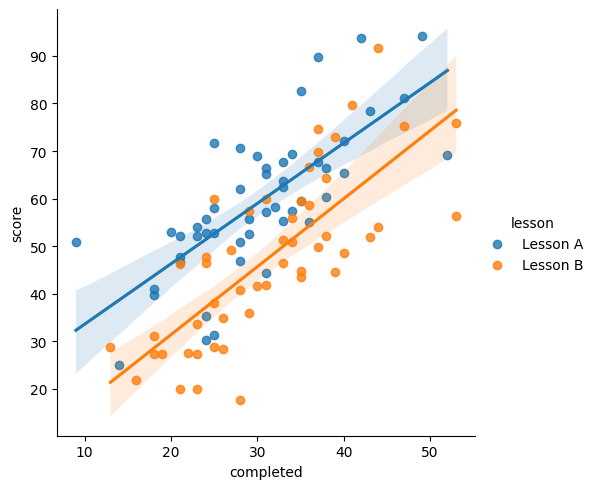

In [123]:
sns.lmplot(x='completed', y='score', hue='lesson', data=codecademy)
plt.show()
plt.close()